# Projet Python data visualisation  
## Modalité d’évaluation 
#### 4 compétences évaluées 
#### Notation sur 20 
#### Consignes 
#### Votre analyse sous forme de Jupyter Notebook devra contenir:
    - Au moins 1 diagramme avec données continues, type nuage de point ou histogramme
    - Au moins 2 diagramme avec des données discrètes
    - Au moins 3 graphiques avec des données catégoriques
    - 1 boîte à moustaches avec filtrage des données aberrantes sur le dataset (si il y en a)
    - 1 heat map avec matrice de corrélation (si pertinent)
    - Des commentaires clairs et pertinents pour chaque graphiques 

Problématique : Quelle type de série a une grande chance d'apprécié par les lecteurs?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [313]:
df = pd.read_csv('./data/manga.csv',sep =";")
df

,name,type,status,date,genres,score,members,rank,popularity,image,quantity
0,A Bewildering Flower,One-shot,Finished,Mar 1998 to ?,Yuri,5.86,379.0,NaN,17526,https://cdn.myanimelist.net/images/manga/2/290...,1.0
1,A Bias Girl,Manhwa,Finished,"Jun 1, 2011 to Feb 15, 2012","Comedy, School, Slice of Life",6.74,NaN,10173.0,6426,https://cdn.myanimelist.net/images/manga/2/150...,15.0
2,A Bittersweet Life,Manhwa,Finished,"Feb 26, 2013","Comedy, Romance, Slice of Life",NaN,355.0,35228.0,18096,https://cdn.myanimelist.net/images/manga/3/148...,31.0
3,A Boy Who Fishes Dreams,One-shot,Finished,Jun 2012,"Drama, Sci-Fi, Psychological",6.62,665.0,11208.0,12945,https://cdn.myanimelist.net/images/manga/5/111...,1.0
4,A Cat and a Bird,Manhwa,Finished,Not available,"Drama, Shoujo, Slice of Life, Psychological",7.01,973.0,7440.0,10208,https://cdn.myanimelist.net/images/manga/4/288...,10.0
...,...,...,...,...,...,...,...,...,...,...,...
51891,9S,Light Novel,Publishing,"Sep 10, 2003 to ?","Action, Mystery, Fantasy, Super Power",NaN,220.0,20112.0,22363,https://cdn.myanimelist.net/images/manga/1/128...,NaN
51892,9S: memories,Light Novel,Finished,"Dec 10, 2007","Action, Sci-Fi, Super Power, Military",NaN,62.0,33812.0,35811,https://cdn.myanimelist.net/images/manga/1/128...,3.0
51893,9S? SS,Light Novel,Finished,"Jan 10, 2006","Action, Comedy, Sci-Fi, Super Power, Military",NaN,62.0,33811.0,35810,https://cdn.myanimelist.net/images/manga/2/128...,5.0
51894,9th Sleep,Manga,Finished,2004 to ?,"Fantasy, Shounen Ai",6.70,968.0,10532.0,10284,https://cdn.myanimelist.net/images/manga/2/595...,3.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51896 entries, 0 to 51895
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        51896 non-null  object 
 1   type        51896 non-null  object 
 2   status      51896 non-null  object 
 3   date        51896 non-null  object 
 4   genres      51752 non-null  object 
 5   score       18388 non-null  float64
 6   members     41978 non-null  float64
 7   rank        35848 non-null  float64
 8   popularity  51896 non-null  int64  
 9   image       42545 non-null  object 
 10  quantity    36464 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 4.4+ MB


On remarque sur les informations qu'il y a 51896 entrer non null au totale.On voit que pour le score à 18388 entrer non null sur 51896.

In [24]:
df.describe()

,score,members,rank,popularity,quantity
count,18388.000000,41978.000000,35848.000000,51896.000000,36464.000000
mean,7.050109,196.628234,18125.914361,26175.179783,19.423788
std,0.495987,231.250339,10475.405438,15107.080221,54.386842
min,2.540000,0.000000,1.000000,1.000000,1.000000
25%,6.740000,39.000000,9035.750000,13102.000000,5.000000
50%,7.030000,91.000000,18092.500000,26173.500000,8.000000
75%,7.330000,267.000000,27222.250000,39261.000000,17.000000
max,9.340000,999.000000,36210.000000,52432.000000,6477.000000


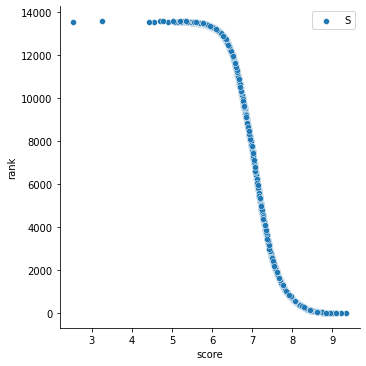

In [328]:
# Digramme du score en fonction du rank
g = sns.relplot(data=df, x="score" , y="rank" )
plt.legend("Série")

On constate dans ce diagramme que le grade d'une série est influencé par son score.

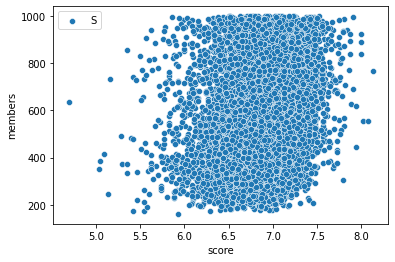

In [329]:
sns.scatterplot(data=df , x="score", y="members")
plt.legend("Série")

On constate que le score des mangas sont assez élever avec un nombre élever de membres tous aussi avec peu de membres.

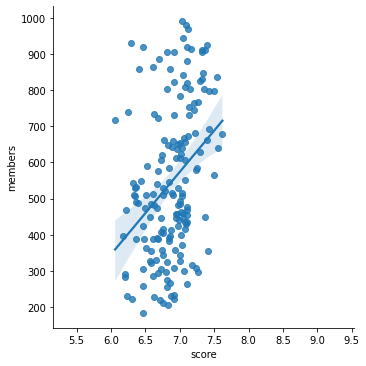

In [331]:
sns.lmplot(data=df.sample(1000),x="score",y="members")

On remarque sur ce diagramme que plus une série a un score élever plus elle a de membres inscrit.

<AxesSubplot:xlabel='type', ylabel='score'>

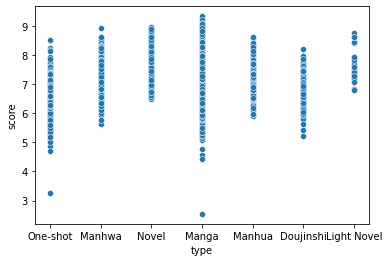

In [47]:
sns.scatterplot(data=df, x="type", y="score")

On constate ici que la plus part des livres on un score entre 9 et 5. Et ce qui sont plus probable d'avoir une note assez élever sont les Novels, les Manhwas et les Mangas.

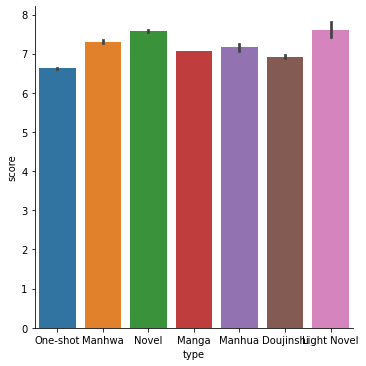

In [155]:
sns.catplot(data=df, x="type", y="score" ,kind="bar")

On remarque que sur ce diagramme que n'importe qu'elle type de livre peuvent avoir un score assez élever.

<AxesSubplot:xlabel='type', ylabel='score'>

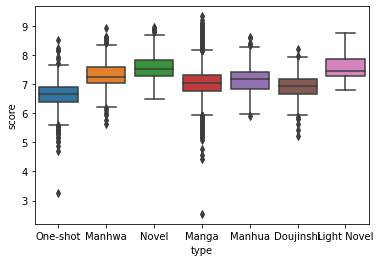

In [127]:
sns.boxplot(data=df , x="type", y="score")

<AxesSubplot:xlabel='type', ylabel='score'>

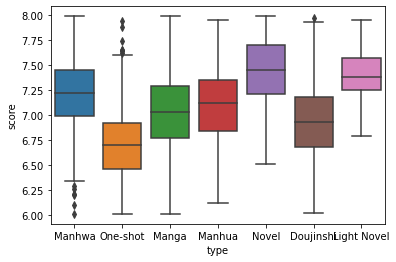

In [279]:
sns.boxplot(data=df[(df["score"]>6)&(df["score"]<8)] , x="type", y="score")

On remarque sur ce boxplot qu'il y a des valeurs abérante. Mais ces valeur abérante sont normale sur le fait que les score sont donnée par le lecteur. Sur ce les données actuelle sont biaser sur le fait que seul les personne qui suive le manga ont donnée une note. Et aussi sur le fait que le nombre de manga et de light Novel par exemple n'ai pas le même il y a une différence trop grande pour pouvoir les comparer et en déduire lequel est le plus aprécier en fonction de sont score. Par exemple, il y a beacoup de manga et sur ce il a beaucoup plus de score différent tandis que qu'il y a peu de light Novel et le score de celui ci a un score plus élever.

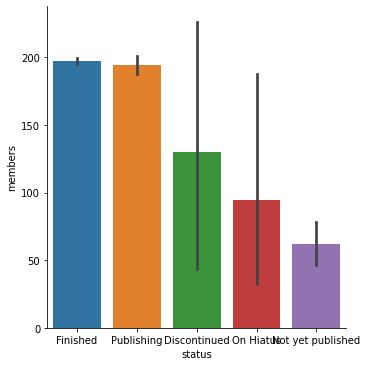

In [322]:
sns.catplot(data=df, x="status", y="members" ,kind="bar")

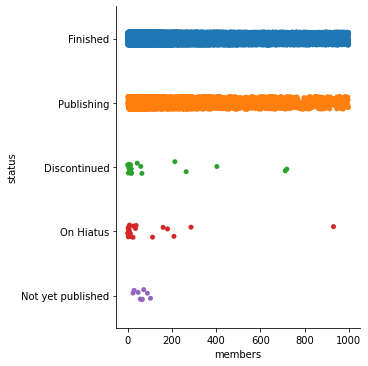

In [169]:
sns.catplot(data=df,x="members",y="status")

On constat aussi que en fonction du status le nombre de membres sont éléver par exemple il y a peu de membre pour le status discontinued ce qui veut dire que les lecteur on moins de chance de suivre un type de manga qui à été abandonné.

<AxesSubplot:xlabel='type', ylabel='members'>

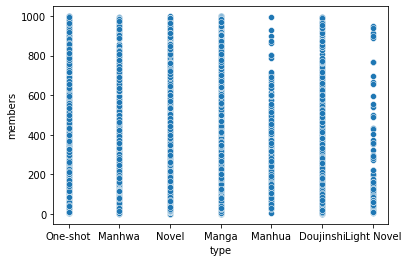

In [159]:
sns.scatterplot(data=df, x="type",y="members")

On remarque ici que le nombre de membres varie en fonction du type mais on remarque que qu'il a moins de membre qui suit les light Novel et les Manhua comparer au manga et les one-shots

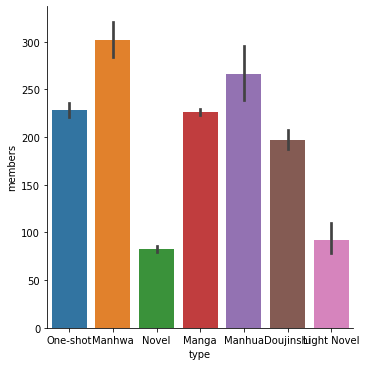

In [41]:
sns.catplot(data=df,x="type", y="members", kind="bar")

On constate sur ce graphique que les light Novel et le Novel ont moins de membres inscrit comparer aux autre type.

In [314]:
df.date = df.date.str.replace("[a-zA-Z,?]","")
df.date = df.date.str.extract("(\d{4})")
df.date

<ipython-input-314-8e60a5d651a8>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.date = df.date.str.replace("[a-zA-Z,?]","")


0        1998
1        2011
2        2013
3        2012
4         NaN
         ... 
51891    2003
51892    2007
51893    2006
51894    2004
51895    2007
Name: date, Length: 51896, dtype: object

On recupère l'année de publication de la séries.

In [315]:
df.date = pd.to_datetime(df.date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51896 entries, 0 to 51895
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   name        51896 non-null  object        
 1   type        51896 non-null  object        
 2   status      51896 non-null  object        
 3   date        49923 non-null  datetime64[ns]
 4   genres      51752 non-null  object        
 5   score       18388 non-null  float64       
 6   members     41978 non-null  float64       
 7   rank        35848 non-null  float64       
 8   popularity  51896 non-null  int64         
 9   image       42545 non-null  object        
 10  quantity    36464 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 4.4+ MB


On transforme la donnée date object en datetime

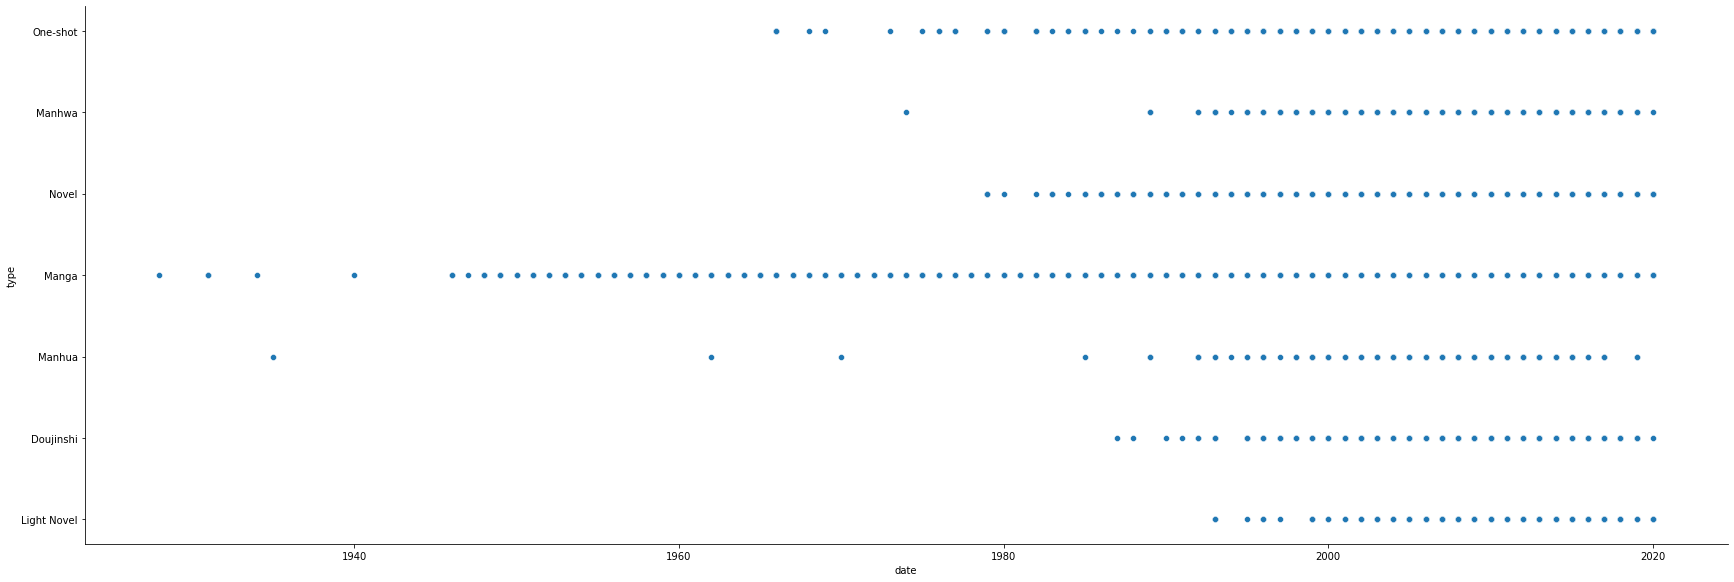

In [292]:
sns.relplot(data=df , x="date",y="type", height=8,aspect=3)

On constat ici que les manga existe depuis 1940 et que c un type de série qui ne veillit pas au fil du temps.
Ces données peuvent être biaser, puisqu'on ne sait pas si par exemple on a dans ces données le premier manhwa qui à été créer

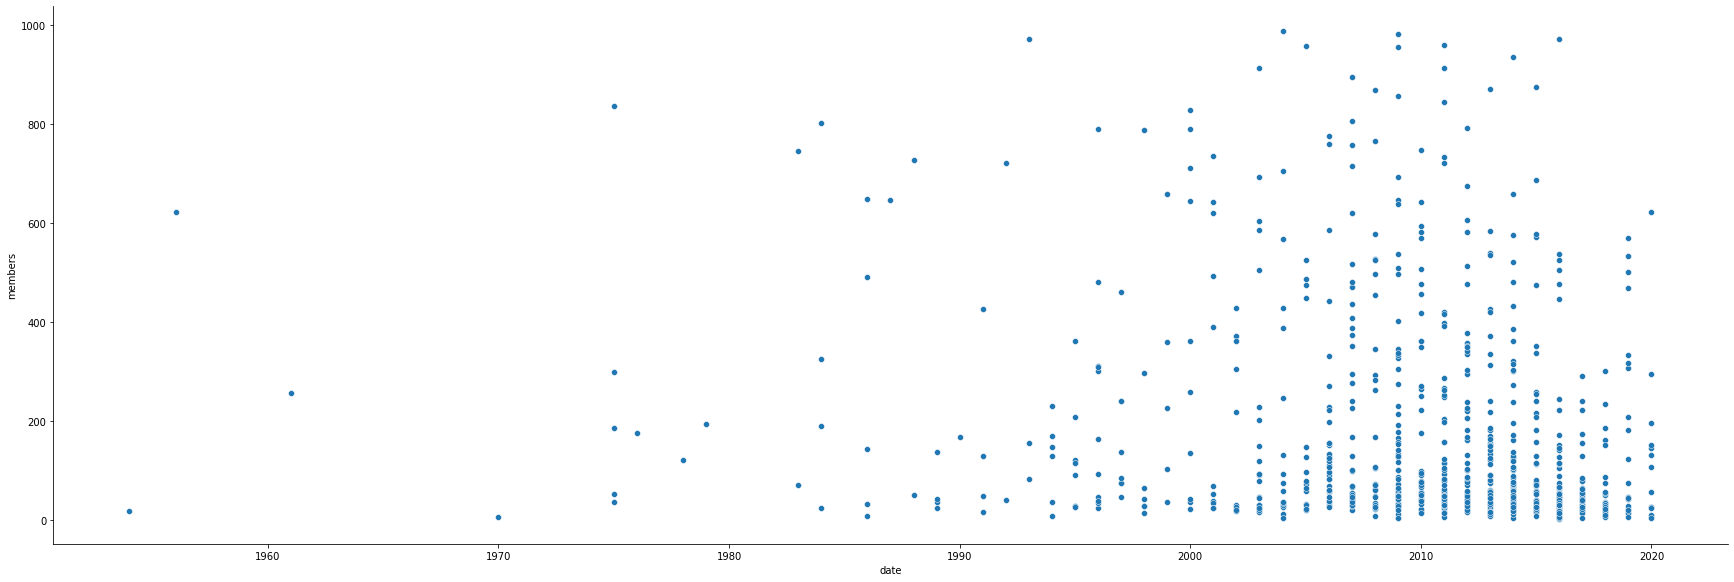

In [288]:
sns.relplot(data=df.sample(1000) , x="date",y="members", height=8,aspect=3)

On constate ici que les mangas de 1990 à 2020 sont suivie par beaucoup de members contrairement à ceux qui sont sortie entre 1960 et 1980.

In [316]:
df.describe()

,score,members,rank,popularity,quantity
count,18388.000000,41978.000000,35848.000000,51896.000000,36464.000000
mean,7.050109,196.628234,18125.914361,26175.179783,19.423788
std,0.495987,231.250339,10475.405438,15107.080221,54.386842
min,2.540000,0.000000,1.000000,1.000000,1.000000
25%,6.740000,39.000000,9035.750000,13102.000000,5.000000
50%,7.030000,91.000000,18092.500000,26173.500000,8.000000
75%,7.330000,267.000000,27222.250000,39261.000000,17.000000
max,9.340000,999.000000,36210.000000,52432.000000,6477.000000


In [317]:
corr=df.corr()
corr

,score,members,rank,popularity,quantity
score,1.000000,0.224143,-0.956195,-0.511372,0.334169
members,0.224143,1.000000,-0.640266,-0.847846,0.020973
rank,-0.956195,-0.640266,1.000000,0.763520,-0.116469
popularity,-0.511372,-0.847846,0.763520,1.000000,-0.121291
quantity,0.334169,0.020973,-0.116469,-0.121291,1.000000


<AxesSubplot:>

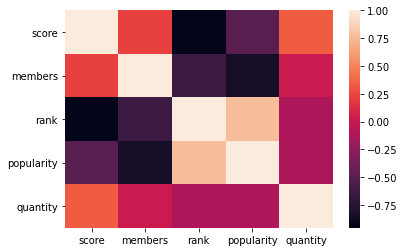

In [318]:
sns.heatmap(corr)

On constate que plus un manga est populaire plus il a d'utilisateur qu'il le suis. Ainsi on remarque osi que plus sont rank et haut plus il a de chance d'être suivie.
On constate aussi que les 2 plus grande donnée a vérifier pour voir si une série et apprécié par un lecteur est le score et les membres qui y sont inscrit.
Mais ces données sont biaser sur le fait que le score qu'on récupère est une moyen des score données par les membres qui suit une série.